# Imports

In [1]:
import sys
sys.path.append('../ClusterPlot')
sys.path.append('./utils')

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [2]:
RANDOM_STATE = 42

In [3]:
ds = DataSetFactory.get_dataset('hourglass2', random_state=RANDOM_STATE, sample=None, is_subset=False)

# 3D Plot

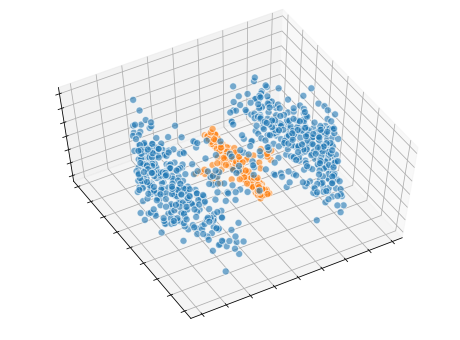

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = ds.df[ds.df[ds.label_col] == 0]['X']
ys = ds.df[ds.df[ds.label_col] == 0]['Y']
zs = ds.df[ds.df[ds.label_col] == 0]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xs = ds.df[ds.df[ds.label_col] == 1]['X']
ys = ds.df[ds.df[ds.label_col] == 1]['Y']
zs = ds.df[ds.df[ds.label_col] == 1]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# remove ticks
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)

ax.view_init(elev=60, azim=60)

plt.show()

In [5]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

# Cluster Plots

In [11]:
blobs_cp = ClusterPlot(reduce_all_points=False,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  random_state=RANDOM_STATE,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=True,
                  show_anchor_level_plot=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance=0.3,
                  smooth_iter=3,
                  magnitude_step=False,
                  show_loss_plot=False)
print(blobs_cp)

ClusterPlot
addr:@4c5d08
verbose=20
logger=<Logger ClusterPlot-34057 (INFO)>
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.42
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
tsne_perplexity=30.0
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot._l_inf_loss at 0x0000016F31C3F798>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1'}
random_state=42
n_jobs=None
dataset='Hourglass2'
show_fig=True
save_fig=True
figsize=(21, 15)
do_animation=False
use_spline=False
alpha=0.8
remove_outliers_k=None
douglas_peucker_tolerance=0.3
smooth_iter=3
skip_polygons_with_area=0.01
mask_relation_in_same_label=True
save_fig_every=1
show_p

2020-05-16 12:57:14,997 - ClusterPlot-34057 - INFO - finding intra class anchors using birch
2020-05-16 12:57:14,997 - ClusterPlot-34057 - INFO - finding intra class anchors using birch
2020-05-16 12:57:15,264 - ClusterPlot-34057 - INFO - UnSupervised Dim Reduction
2020-05-16 12:57:15,264 - ClusterPlot-34057 - INFO - UnSupervised Dim Reduction
2020-05-16 12:57:15,267 - ClusterPlot-34057 - INFO - Dim Reduction only anchors
2020-05-16 12:57:15,267 - ClusterPlot-34057 - INFO - Dim Reduction only anchors
2020-05-16 12:57:15,344 - ClusterPlot-34057 - INFO - Dim Reduction only anchors - generate random points in low dim per anchor
2020-05-16 12:57:15,344 - ClusterPlot-34057 - INFO - Dim Reduction only anchors - generate random points in low dim per anchor
100%|███████████████████████████████████████████████████████████████████████████████| 966/966 [00:07<00:00, 137.00it/s]
2020-05-16 12:57:22,643 - ClusterPlot-34057 - INFO - Starting iteration 1 loss = 0.54629754974956
2020-05-16 12:57:22,64

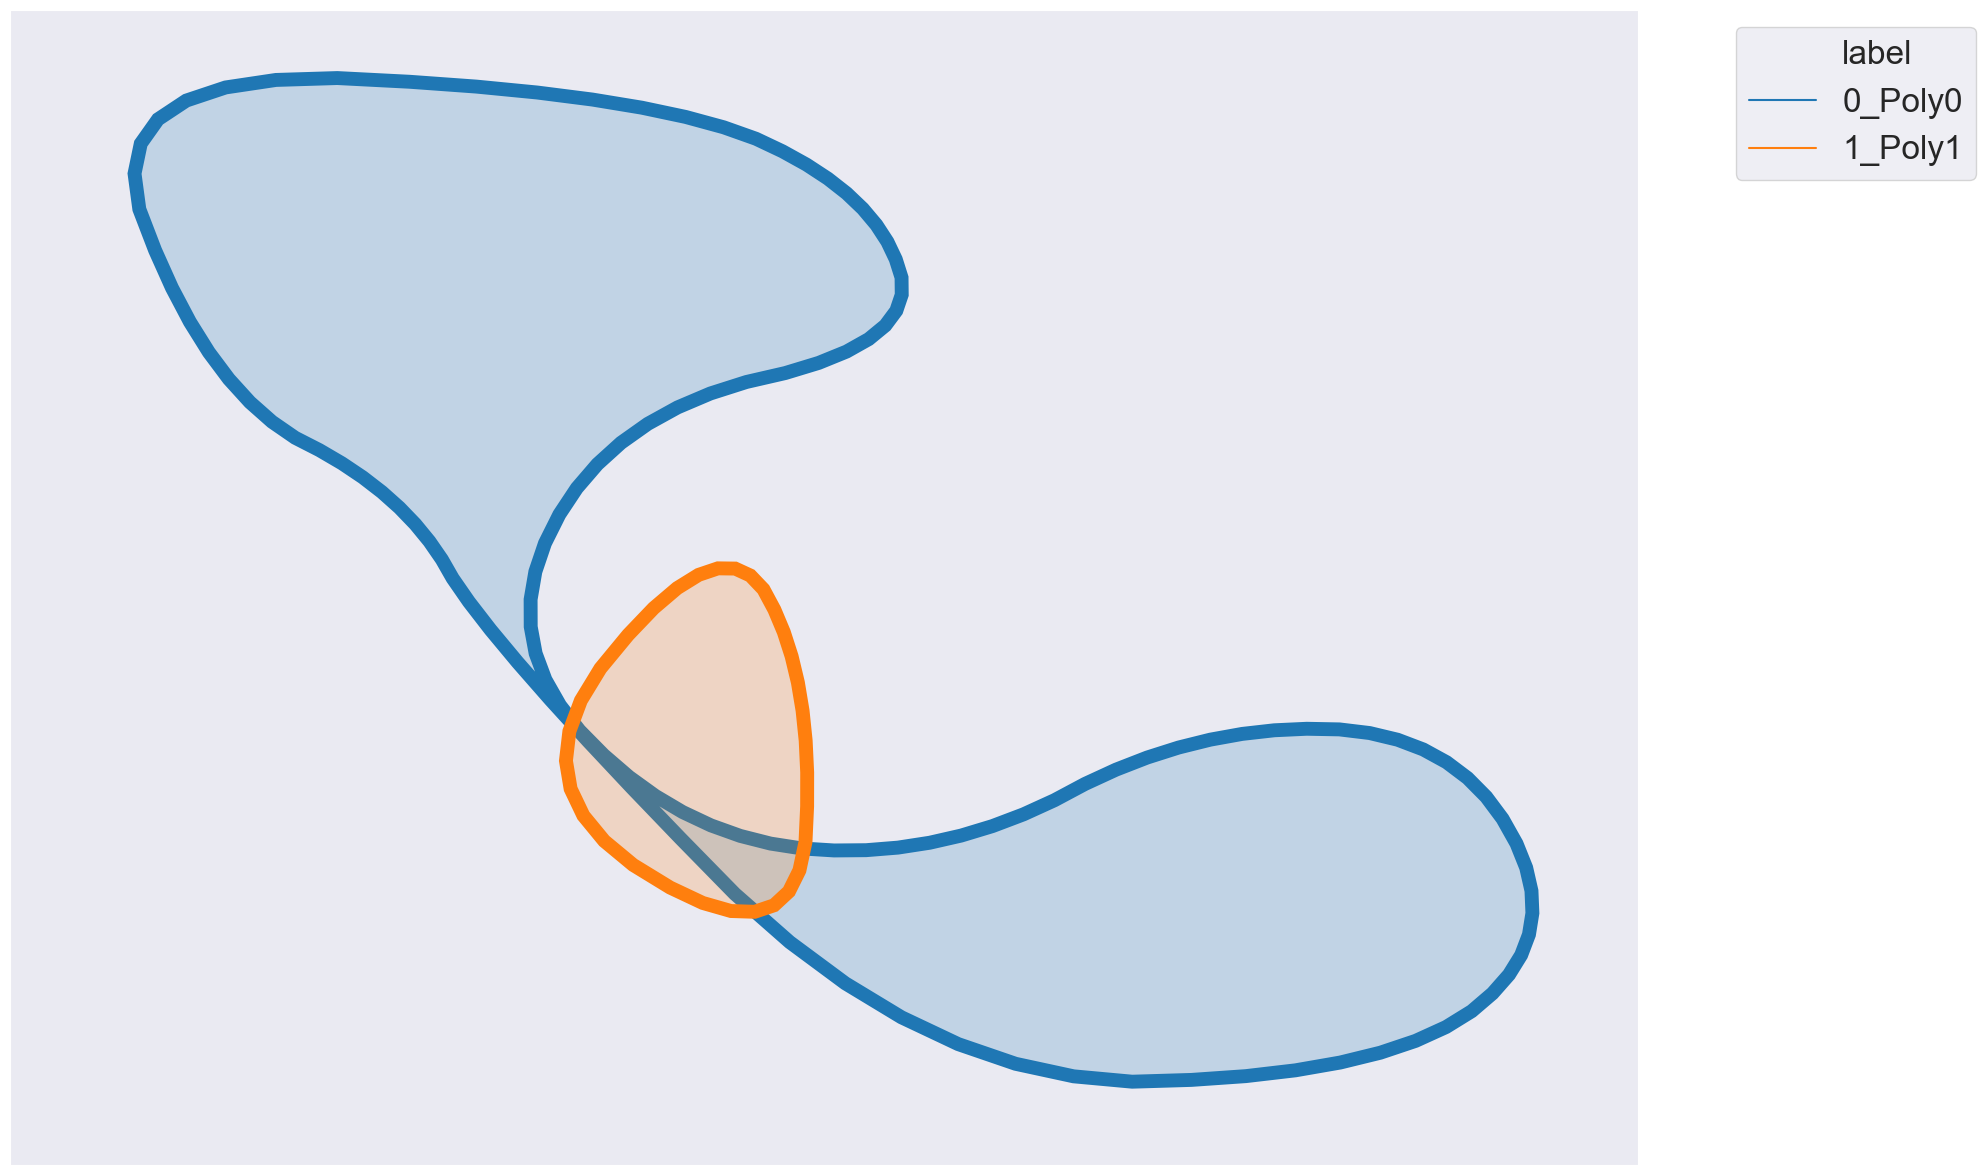

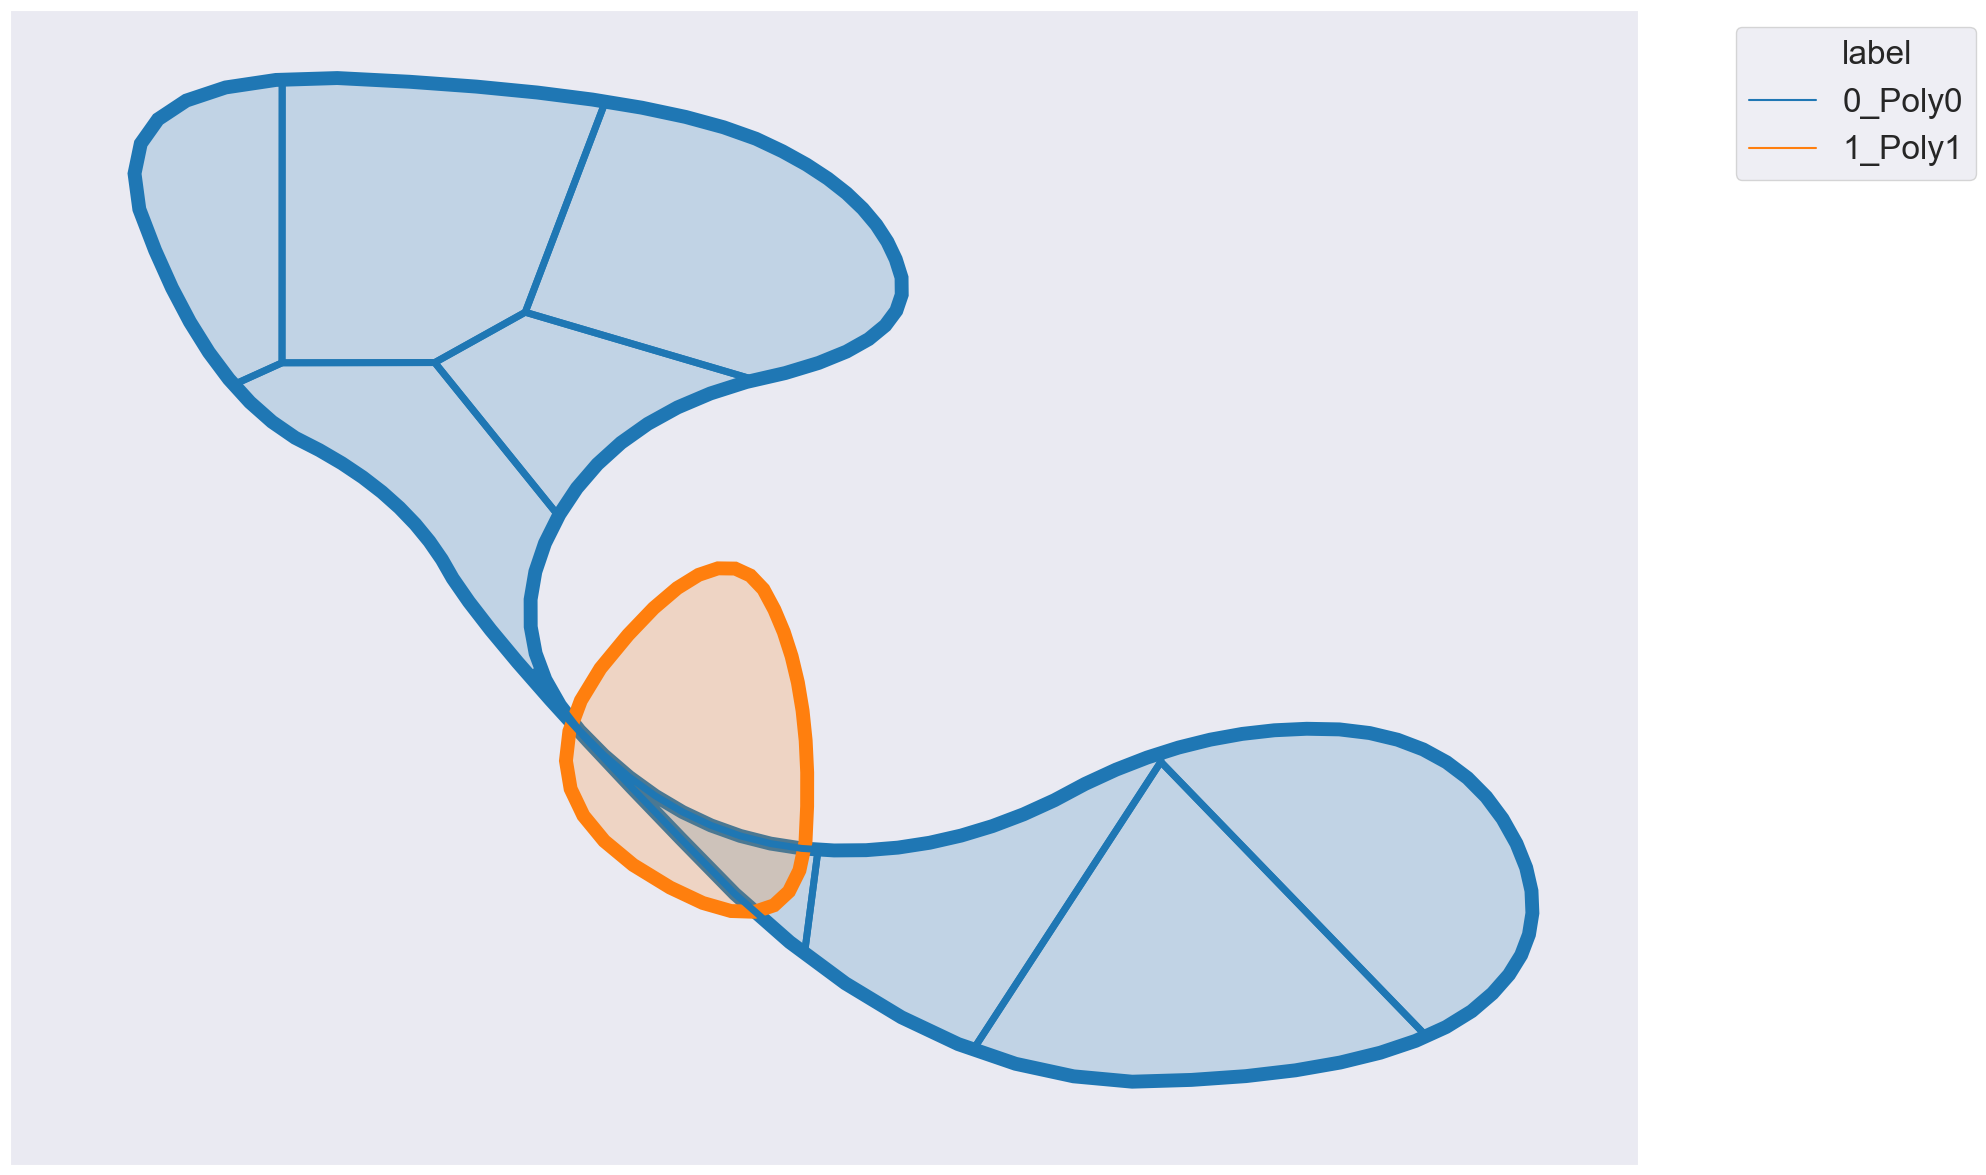

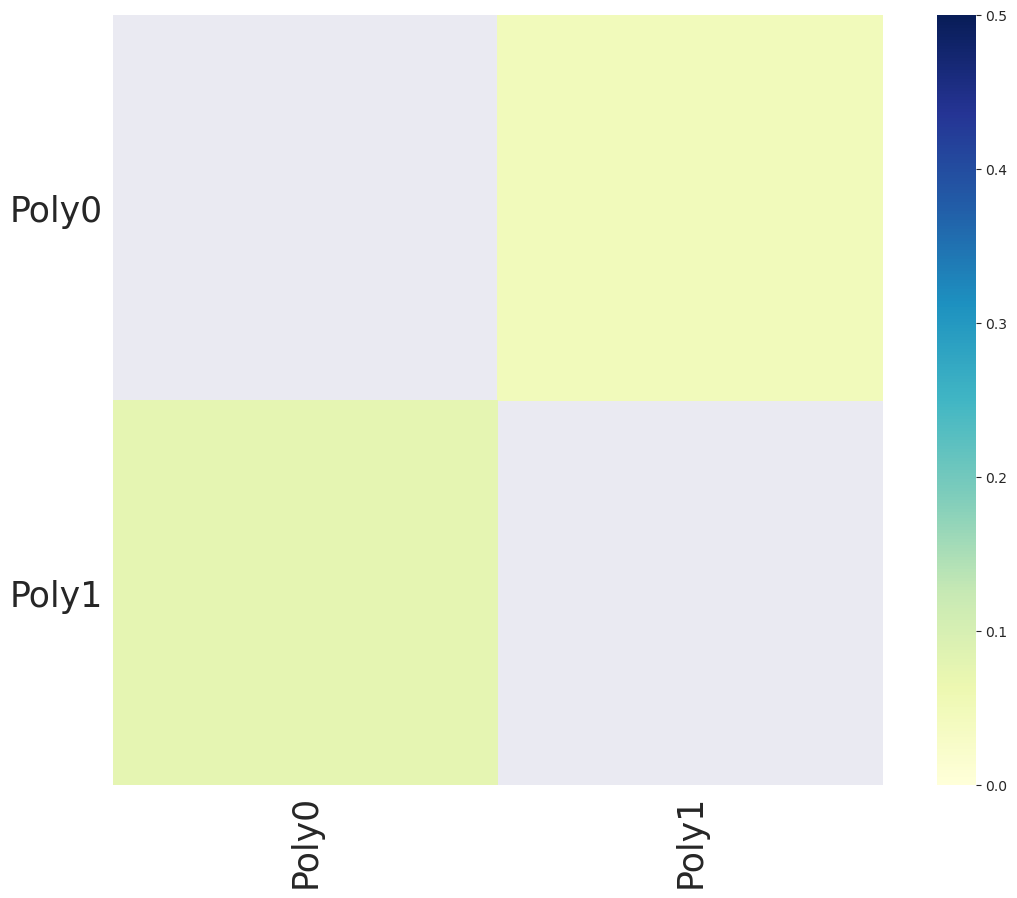

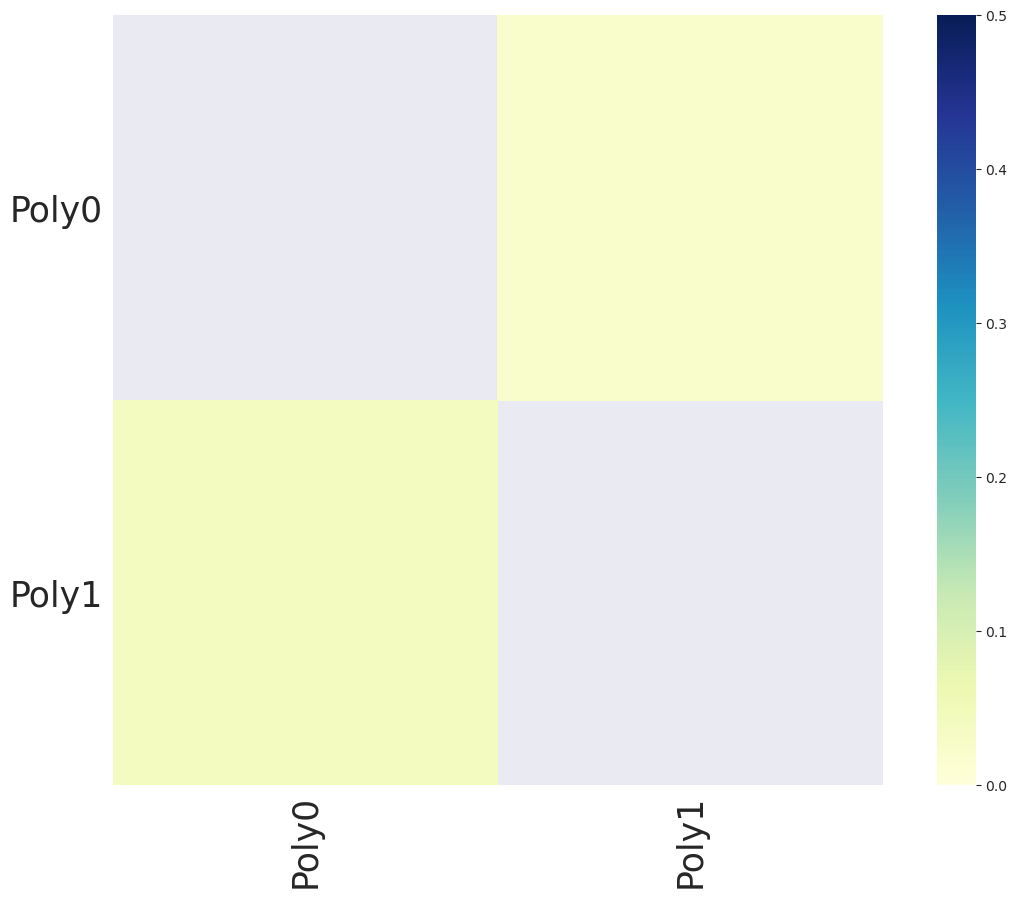

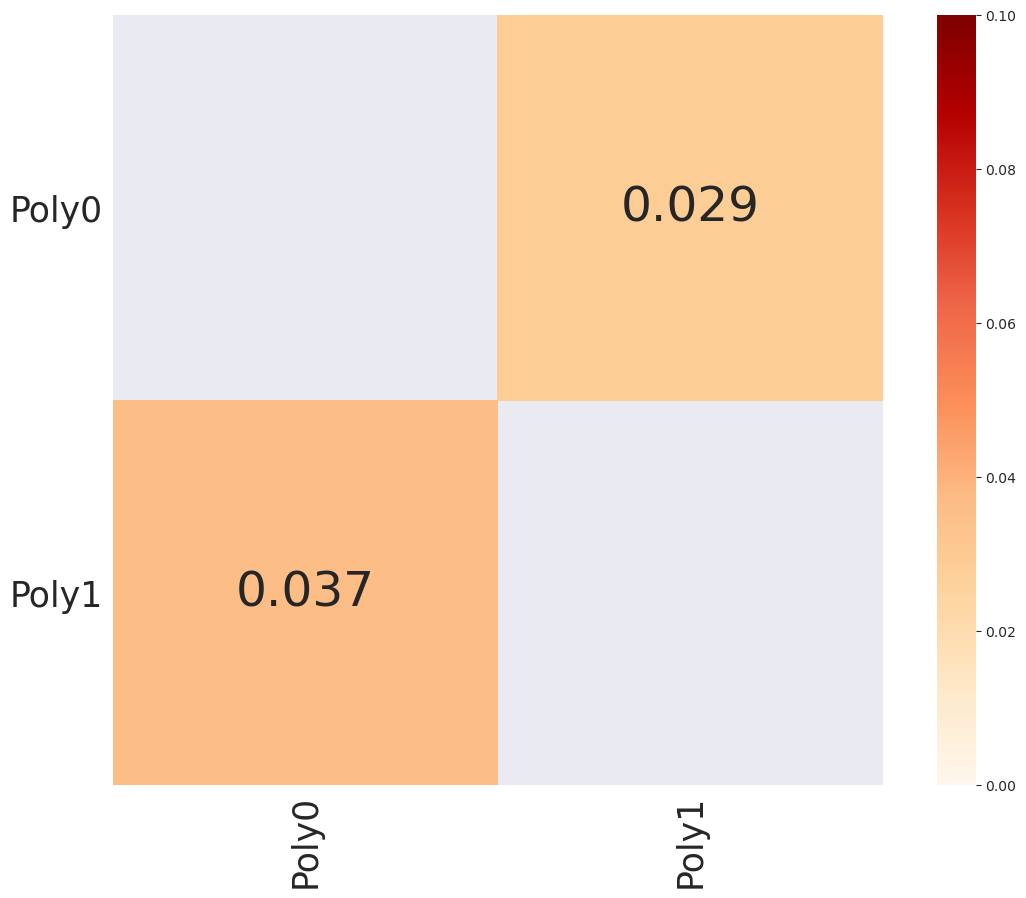

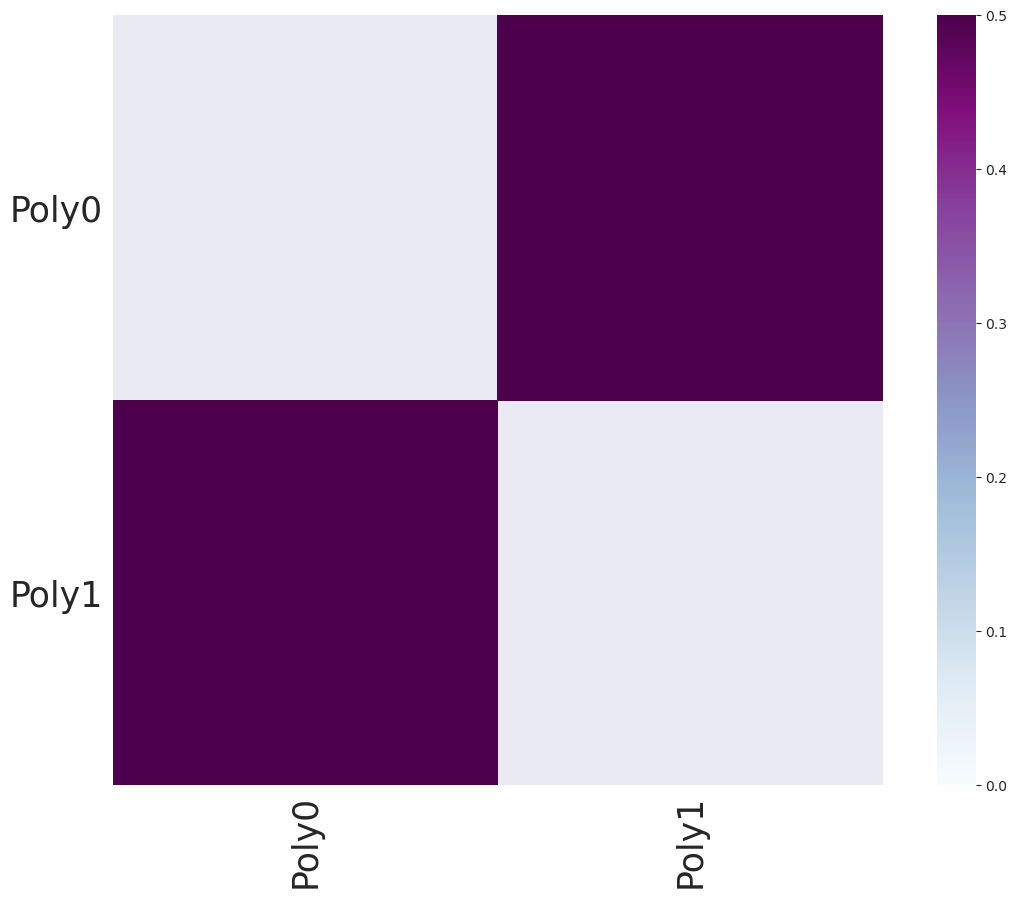

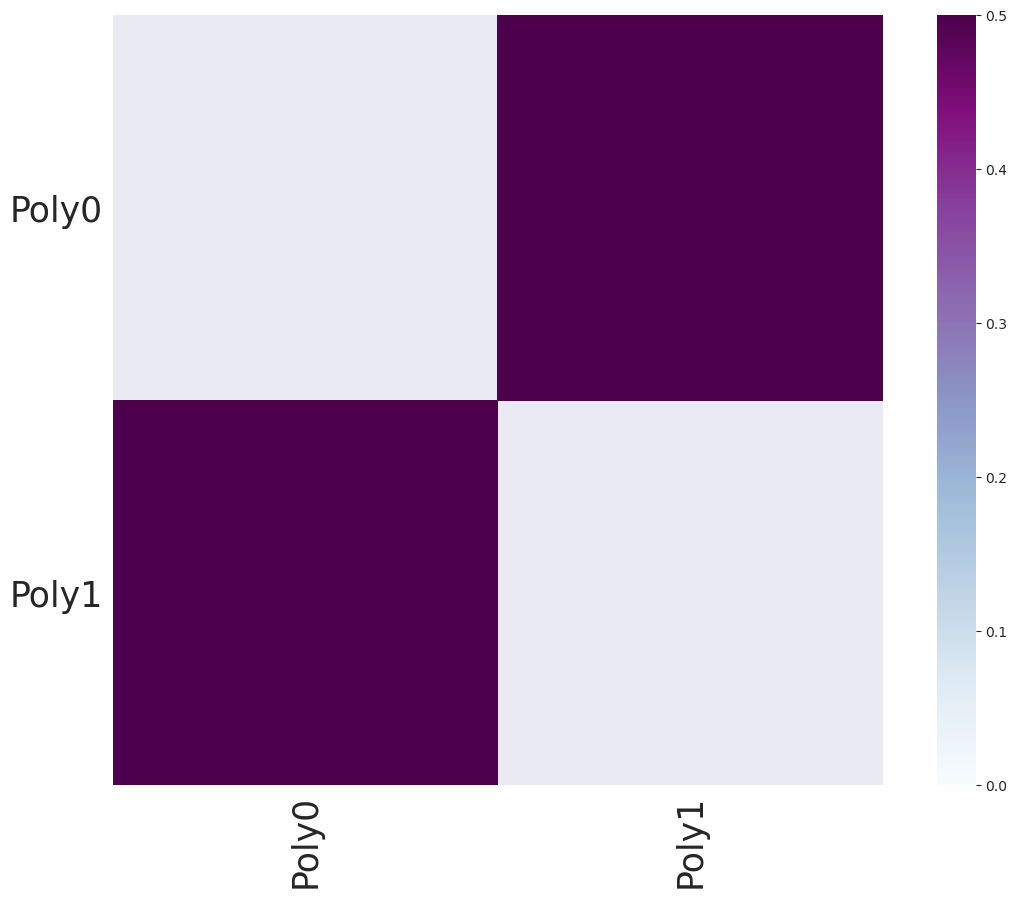

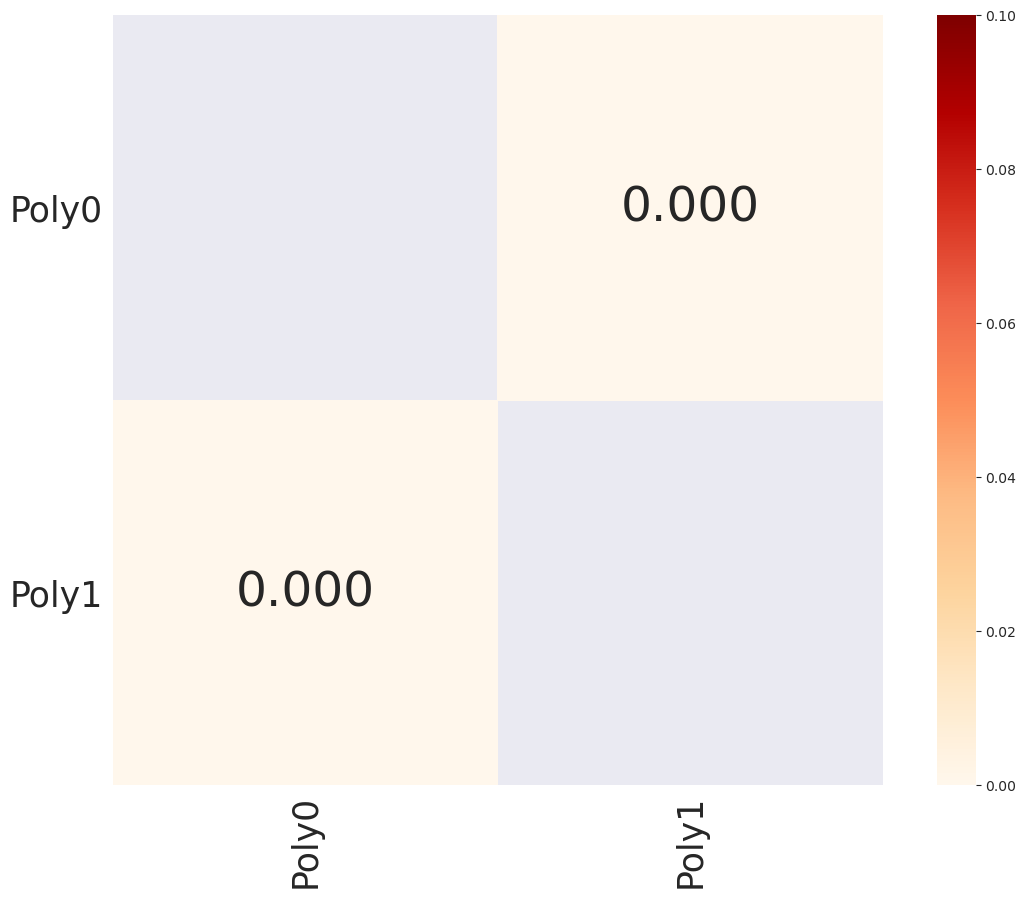

In [12]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)